# Bagging

This notebook introduces a very natural strategy to build ensembles of machine learning models named "bagging".

"Bagging" stands for Bootstrap AGGregarING. It uses bootstrap resampling (random sampling with replacement) to learn several models on random variations of the training set. At predict time, the predictions of each learner are aggregated to give the final predictions.

First, we will generate a simple synthetic dataset to get insights regarding bootstraping:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create a random number generator
rng = np.random.RandomState(1)

def generate_data(n_samples=30):
    """Generate synthetic dataset. Returns `data_train`, `data_test`,
    `target_train`."""
    x_min, x_max = -3, 3
    x = rng.uniform(x_min, x_max, size=n_samples)
    noise = 4.0 * rng.randn(n_samples)
    y = x ** 3 - 0.5 * (x + 1) ** 2 + noise
    y /= y.std()

    data_train = pd.DataFrame(x, columns=["Feature"])
    data_test = pd.DataFrame(
        np.linspace(x_max, x_min, num=300), columns=["Feature"])
    target_train = pd.Series(y, name="Target")

    return data_train, data_test, target_train

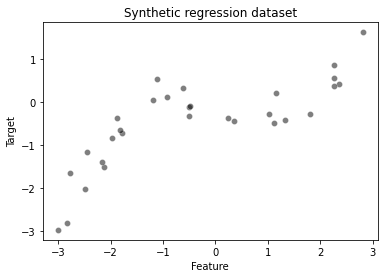

In [3]:
data_train, data_test, target_train = generate_data(n_samples=30)
sns.scatterplot(x=data_train["Feature"], y=target_train, color="black",
                alpha=0.5)
_ = plt.title("Synthetic regression dataset")

The relationship between our feature and the target to predict is non-linear. However, a decision tree is capable of approximating such a non-linear dependency:

In [4]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(data_train, target_train)
y_pred = tree.predict(data_test)

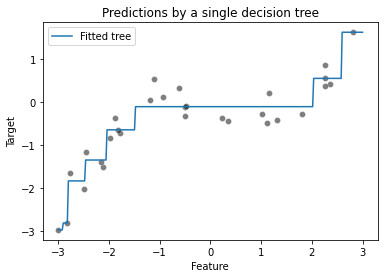

In [5]:
sns.scatterplot(x=data_train["Feature"], y=target_train, color="black",
                alpha=0.5)
plt.plot(data_test, y_pred, label="Fitted tree")
plt.legend()
_ = plt.title("Predictions by a single decision tree")